# Data Visualization with Seaborn Complete Note
Run the hidden code cell below to import the data used in this course.

## Contents:
1. Distribution Plot with types like kde, rug, fill, cdfe
2. Regression Plot using regplot and lmplot
3. Relational Plots
	1. Scatter Plot
    2. Line Plot
4. Categorical Plots
	1. Count Plot
    2. Box Plot
   	3. Point Plot
5. Joint Grid and Joint Plot : The Ultimate Plot
6. Styling the plot using set and set_style
7. Removing axes using despine
8. Generating and plotting color palettes using color_palette and palplot
9. Styling the axes for labels, limits using set and plt.subplots()
10. Plot titles, labels and rotations using xticks(rotate=90)

# WHEN TO USE WHICH?
**Univariate Distribution Analysis:**:displot(), rugplot(), kdeplot(), ecdfplot()

**Regression analysis:**:lmplot()

**Categorical Plot:**: boxplot(), violinplot(), point(), bar(), catplot()

**Final Processing:** pairplot(), jointplot() (used after regression is performed using lmplot or analysation using displot or both)

In [1]:
# Importing the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the course datasets
bike_share = pd.read_csv('datasets/bike_share.csv')
college_data = pd.read_csv('datasets/college_datav3.csv')
daily_show = pd.read_csv('datasets/daily_show_guests_cleaned.csv')
insurance = pd.read_csv('datasets/insurance_premiums.csv')
grants = pd.read_csv('datasets/schoolimprovement2010grants.csv', index_col=0)
country_data = pd.read_csv('datasets/countries-of-the-world.csv', decimal=",")
mpg = pd.read_csv('datasets/mpg.csv')
student_data = pd.read_csv('datasets/student-alcohol-consumption.csv', index_col=0)
survey = pd.read_csv('datasets/young-people-survey-responses.csv', index_col=0)

# Seaborn Data Visualization

1. df['ColName'].plot.hist() \ plt.show( )
2. sns.displot(df['ColName']) => Distribution plot (similar to histogram)


# Distribution Plot
Syntax:

**sns.displot(df['colName'], kind = 'kde or 'rug' or'ecdf' kde = True, rug=True, fill=True, bins=10)**

kde = overlays a line for curve

rug = applies the rug

fill = fills the insides of histogram bins 

kind  = kde plots curve, rug plots points on x axis, ecdf produces cumulative sum

_Note: using kde=True will produce both histogram and curve
but using kind='kde' will produce curve only_


In [2]:
bike_share.head(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


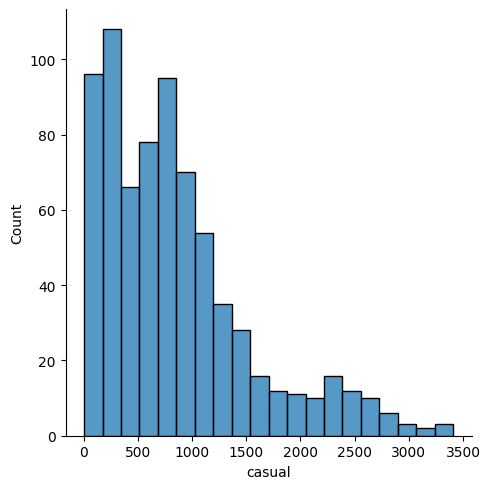

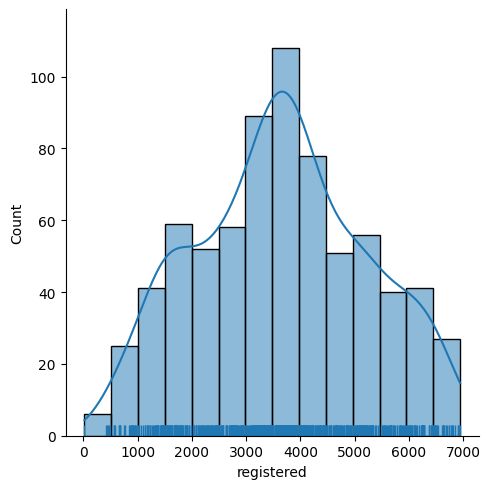

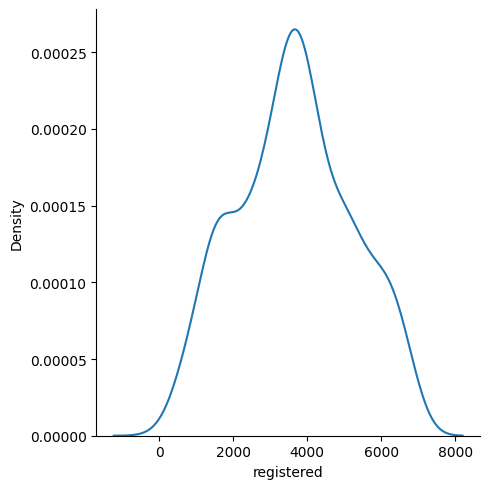

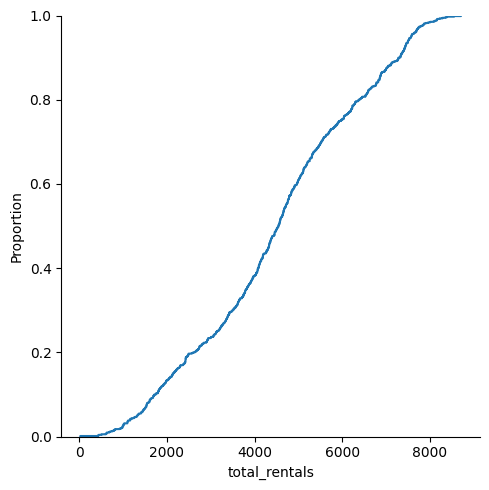

In [3]:
# Peeking the data
# print(bike_share.head(10))

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the 'casual' column using displot
sns.displot(bike_share['casual'])
plt.show()

# Plotting the 'registered' column using displot
sns.displot(bike_share['registered'], rug=True, fill=True, kde = True)
plt.show()

# Plotting the curve only for checking distribution
sns.displot(bike_share['registered'], kind='kde', fill=False)
plt.show()

# Plotting cumulative plot on 'total_rentals' column using displot
sns.displot(bike_share['total_rentals'],kind='ecdf')
plt.show()

# Regression Plots
Regression analysis is bivariate

Used to check relationship between two variables.

Syntax:

**sns.regplot(data=df, x='Colname1', y='Colname2', order=1, fit_reg=False)**

**sns.lmplot(data=df, x='Colname1', y='Colname2', hue='Colname', col='ColName')**

**sns.residplot(data=df, x="colName1", y="ColName2", order=2)** => used to plot residues
hue = used to set colors based on a column

fir_reg = False disables the regression line

col = used to subdivide the plots based on a column

order = changes the order of variables by certain degree, eg: 2 plots x^2 and y^2

_Note: sns.regplot() and sns.lmplot() have same syntax but lmplot is highlevel and regplot is lowlevel.
lmplot can use arguments like hue and col but regplot cannot_


In [4]:
# Peeking into the dataframe
college_data.head(5)

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [5]:
college_data.dtypes

INSTNM               object
OPEID                 int64
REGION                int64
SAT_AVG_ALL         float64
PCTPELL             float64
PCTFLOAN            float64
ADM_RATE_ALL        float64
UG                  float64
AVGFACSAL           float64
COMPL_RPY_5YR_RT     object
DEBT_MDN             object
MEDIAN_HH_INC        object
ICLEVEL               int64
HIGHDEG               int64
CONTROL               int64
WOMENONLY           float64
MENONLY             float64
LOCALE              float64
Tuition             float64
Degree_Type          object
Ownership            object
Regions              object
Locales              object
Locale_Short         object
dtype: object

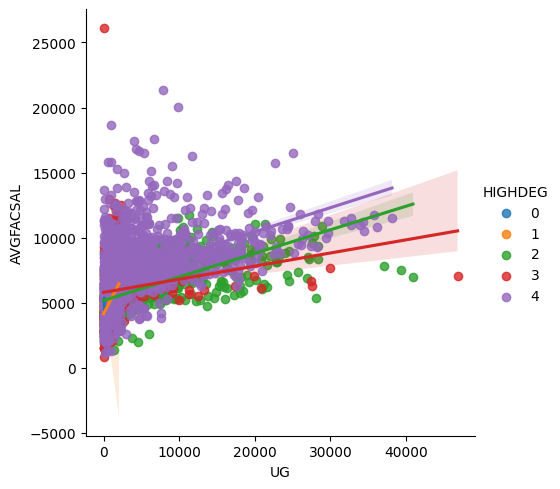

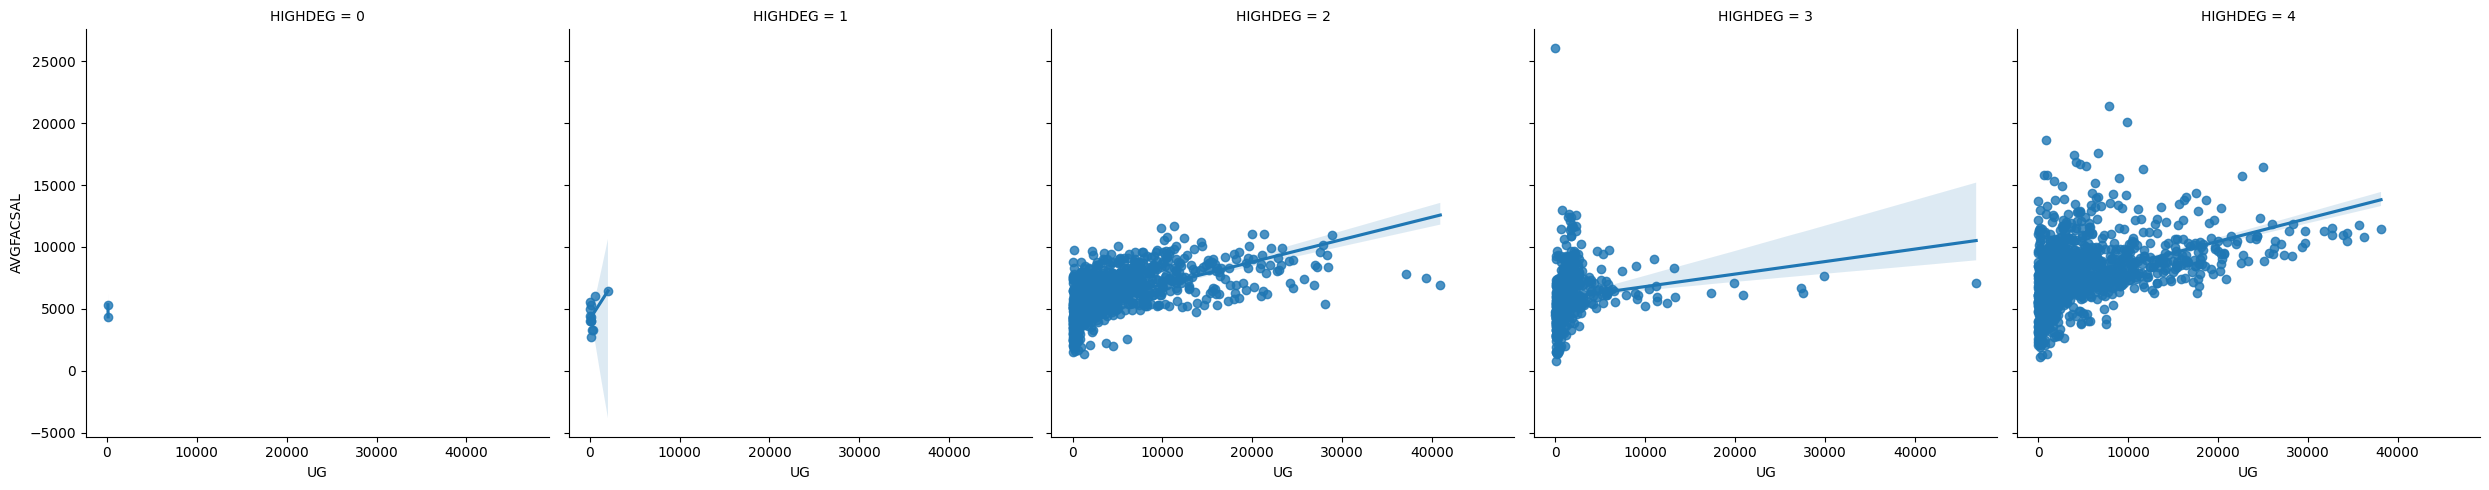

In [6]:
# Plotting to see relation between 'PCTFLOAN' and 'DEBT_MDN'
import seaborn as sns
import matplotlib.pyplot as plt

# Setting hue to differentiate line plots
sns.lmplot(data=college_data, x='UG', y='AVGFACSAL', hue= 'HIGHDEG')
plt.show()

# Dividing into different plots for easier readability
sns.lmplot(data=college_data, x='UG', y='AVGFACSAL', col= 'HIGHDEG')
plt.show()

# Relational Plots

## Syntax of sns.relplot()

**sns.relplot(x=, y=, data=, kind=, row=, col=, row_order=[],col_order=[], size=)**

x, y, data, kind are mandatory and self explanatory

1. row = classify through a df column row wise
2. col = classify through a df column col wise
3. row_order= set custom row order while classifying row wise
4. col_order = set custom column order while classifying column wise
5. size = to set the size of dot in scatter plot based on the number from data in another column
6. hue = to set the saturation of color based on number (used with size normally)
7. style = change the type of point 
8. alpha = setting transparency 

## 1. Scatter plots
scatter plots are used between two quantitative variables 

For making relational plots we have to use the relplot function.
Topics covered in the chapter:

### Syntax:
**sns.relplot(x="",y="", data=dataframeName, kind="scatter", row/column="columnName in dataframe")**

Always recheck if any parameters are missing or not like 
**kind**, or 

row arranges in row whereas column arranges in column.


In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Dividing plots into columns based on region
# sns.relplot(x="Country", y="Population", kind="scatter", col="Region", data=country_data)
# plt.show()

In [8]:
# peeking the data
print(country_data.head(1))

        Country                         Region  Population  Area (sq. mi.)  \
0  Afghanistan   ASIA (EX. NEAR EAST)             31056997          647500   

   Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  Net migration  \
0                        48.0                           0.0          23.06   

   Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
0                              163.07               700.0          36.0   

   Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  Birthrate  \
0                3.2       12.13       0.22      87.65      1.0       46.6   

   Deathrate  Agriculture  Industry  Service  
0      20.34         0.38      0.24     0.38  


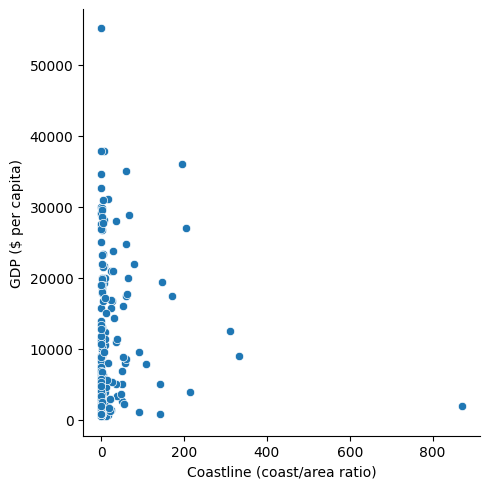

In [9]:
# Plotting scatter plot on Coastline and GDP
sns.relplot(x="Coastline (coast/area ratio)", y="GDP ($ per capita)", data=country_data, kind="scatter")
plt.show()

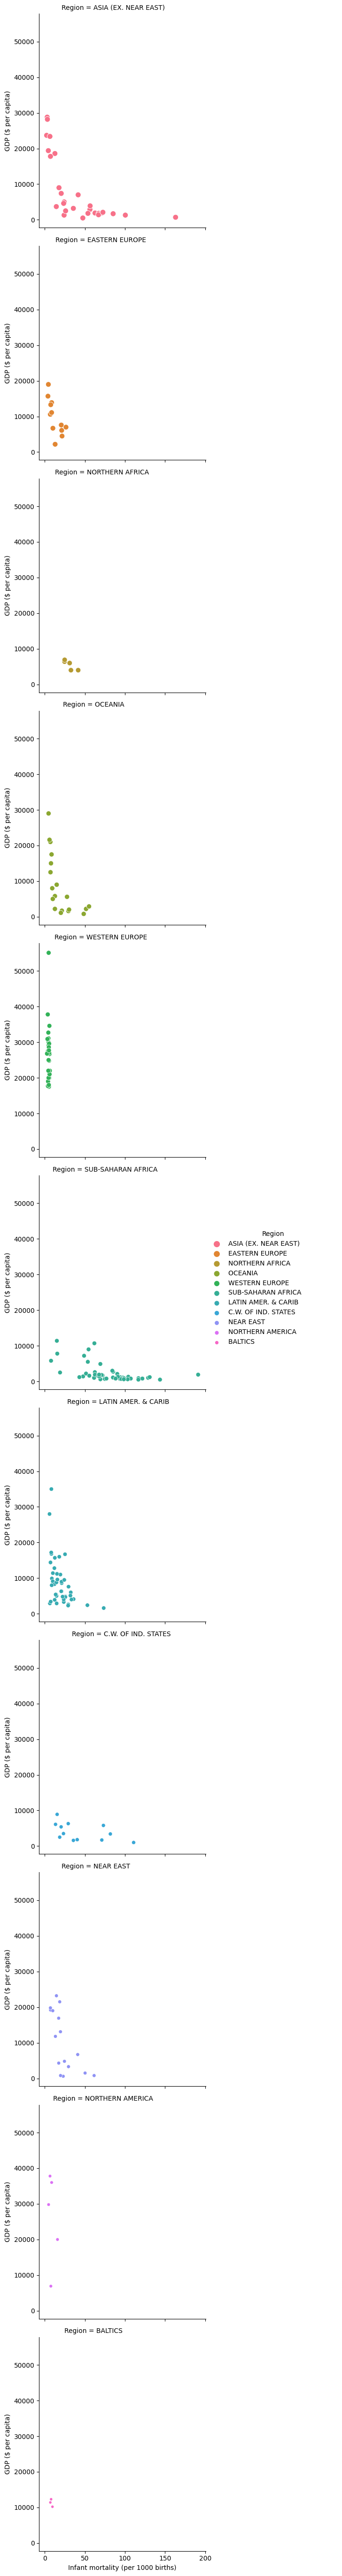

In [10]:
# printing multiple plots for each region
sns.relplot(x="Infant mortality (per 1000 births)", y="GDP ($ per capita)", data=country_data, kind="scatter", hue="Region", size="Region", row="Region")

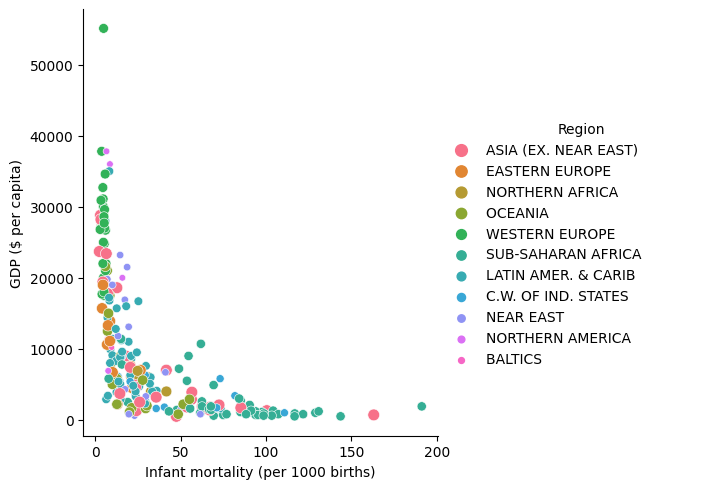

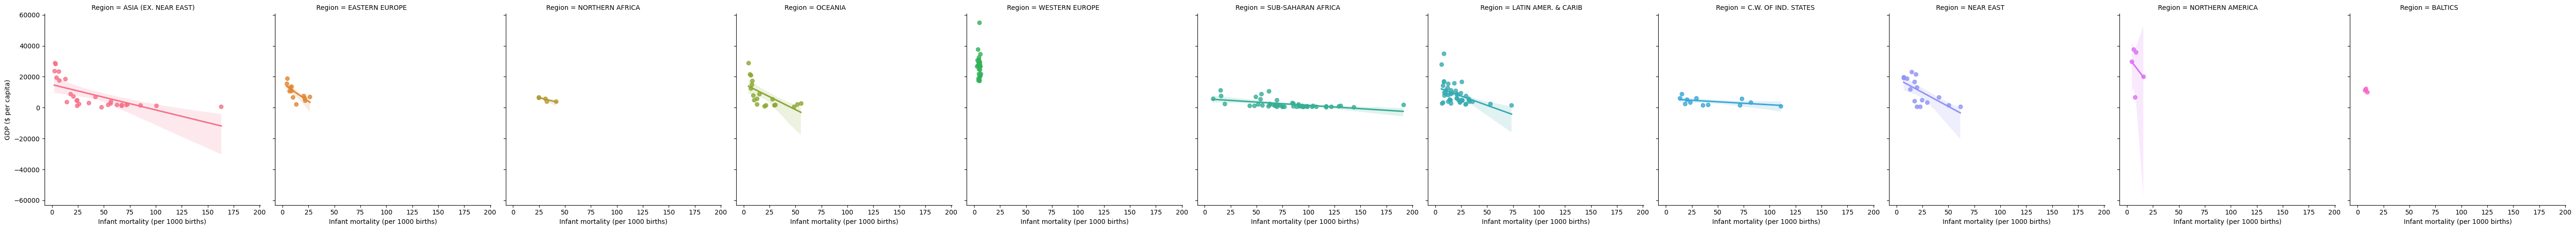

In [11]:
# WATCHING ALL REGIONS AT ONCE
sns.relplot(x="Infant mortality (per 1000 births)", y="GDP ($ per capita)", data=country_data, kind="scatter", hue="Region", size="Region")
plt.show()

sns.lmplot(data=country_data, x='Infant mortality (per 1000 births)',y='GDP ($ per capita)', hue="Region", col="Region")
plt.show()

## 2. Lineplots

Line plots are similar to scatter plots except they are used to track over time

**sns.relplot(x, y, data, kind="line", style='colName', hue='colName', markers=True, ci=None)**

1. markers = will plot the data point on the line (Bool)
2. dashes = Bool
3. ci = set confidence interval (Ex: "sd", None,)

           Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39    

c:\Users\xarad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


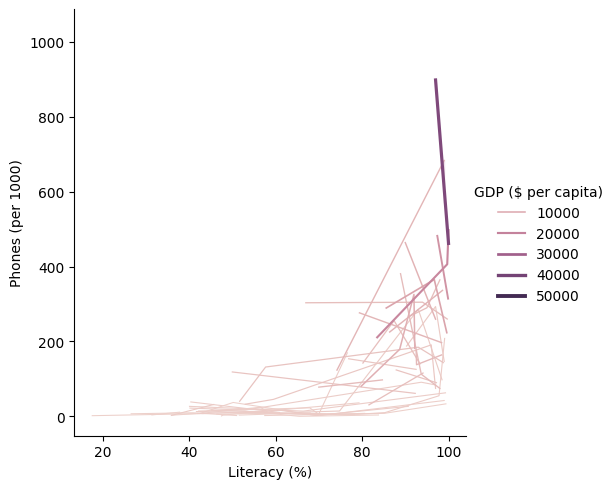

In [12]:
print(country_data.head(4))
# Creating a line plot
sns.relplot(x="Literacy (%)", y="Phones (per 1000)", data=country_data, kind="line",size="GDP ($ per capita)", hue="GDP ($ per capita)", ci="sd")
plt.show()

# Categorical Plots
Used to plot numerical value with limited quantity

Three groups:
1. stripplot, swarmplot
2. abstract representations : boxplot, violinplot, boxenplot
3. statistical estimates : barplot, pointplot, countplot

examples:
count plots
bar plots

cat plots are used like countplots but we can add subplots like rows and columns in catplots

## General Syntax:

**sns.catplot(x="columnName",y="columnName",data=Dataframe, hue, row, col)**


## 1. Count Plot
**sns.catplot(x,y,data,kind="count",order=[])**
1. order = to order the bar plot

sns.catplot(x,y,data,kind="bar", ci)

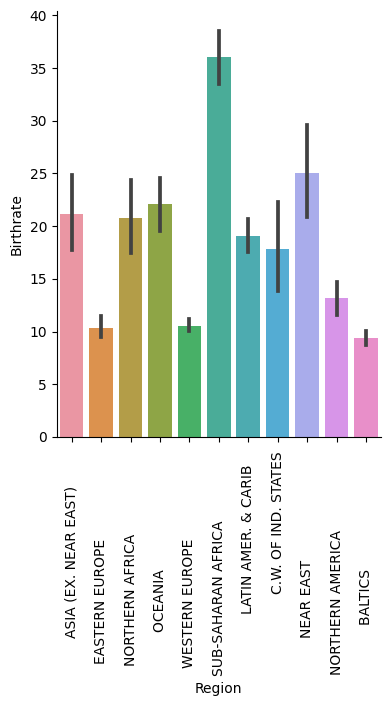

In [13]:
# Plotting bar plot between region and birthdate
sns.catplot(x="Region",y="Birthrate", data=country_data, kind="bar", legend=False)

# Rotating the xlabel by 90 degrees for readability
plt.xticks(rotation=90)
plt.show()

## 2. Box Plot
Shows 25th and 95th percentile, median, skewness and outliers

Syntax:

**sns.catplot(x,y,data,kind="box", order=[ ], sym="", whis=)**

1. sym = list the outliers (Use "" for removing the outliers )
2. whis = extend to a certain value  default 1.5*IQR (setting 2 means 2 * IQR)
3. min and max values (whis = [0, 100]) = sets the minimum and maximum values, whis = [5,95] sets the 5th and 95th percentiles as whiskers)
_There is no outliers in whis=[0,100] because it sets max and min values from the data_

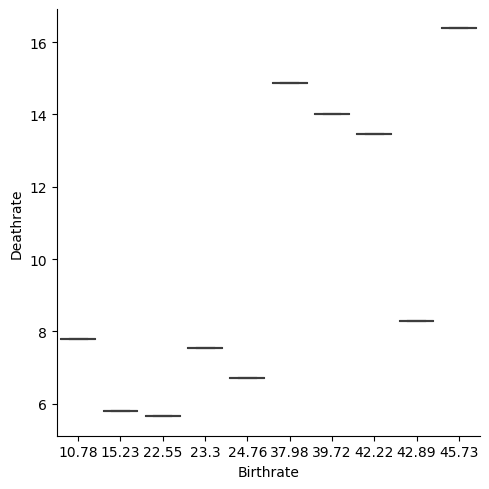

In [14]:
sample_country = country_data.sample(10)
sns.catplot(kind="box", x="Birthrate", y="Deathrate", data=sample_country, whis=[5,95])
plt.show()

## 3. Point Plot
Like line plots that shows mean and 95% CI but x and y are quantitave variable where x is categorical

**Use point plots when:**

you need to see slope of line

SYNTAX :

**sns.catplot(x,y,data,kind="point", capsize = , join, estimator, ci)**

1. capsize = 2 sets the size of cap to 2
2. join = Bool, whether join the lines of not
3. estimator = median or mean
3. ci = None or list

In [15]:
# Looking into student_data
student_data.head(5)

,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,schoolsup,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,GP,F,18,GT3,A,4,4,2,0,yes,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,GP,F,17,GT3,T,1,1,1,0,no,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,GP,F,15,LE3,T,1,1,1,3,yes,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,GP,F,15,GT3,T,4,2,1,0,no,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,GP,F,16,GT3,T,3,3,1,0,no,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [16]:
# Looking into data types
student_data.dtypes

school        object
sex           object
age            int64
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
traveltime     int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
location      object
study_time    object
dtype: object

C:\Users\xarad\AppData\Local\Temp\ipykernel_14364\1808870775.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(kind="point",data=student_data, x='age',y='famrel', ci=None, capsize = 3)


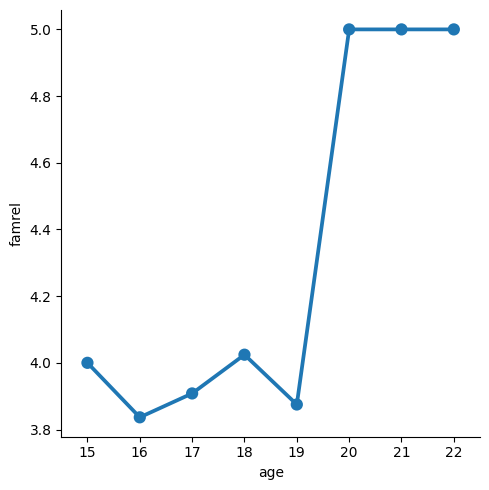

In [17]:
# Plotting point plot between age and traveltime
sns.catplot(kind="point",data=student_data, x='age',y='famrel', ci=None, capsize = 3)
plt.show()

## 4. Strip Plot

Syntax:

**sns.stripplot(data=df, x='Colname',y='Colname', jitter=True)**

jitter adds random values in order to view it more efficiently

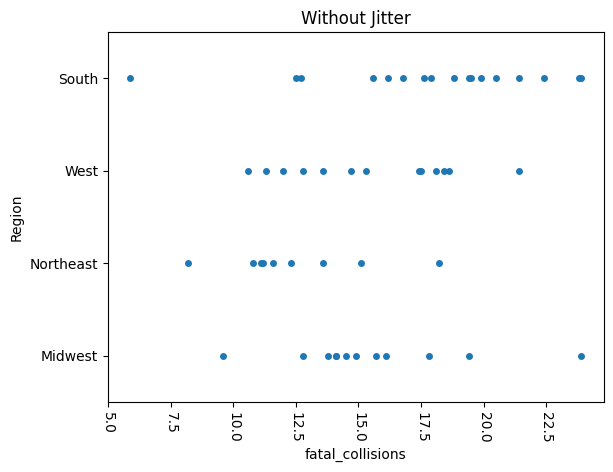

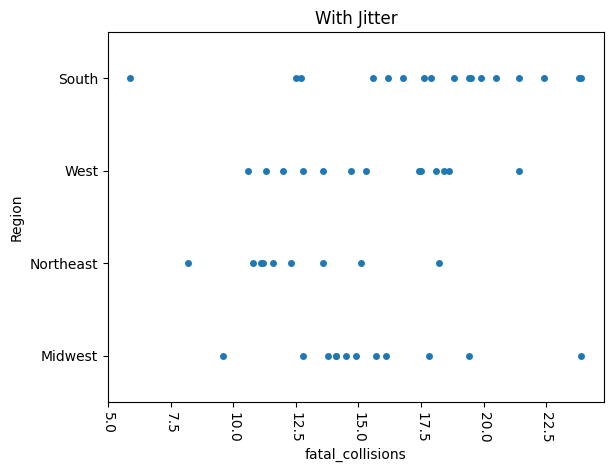

In [18]:
# Plotting a strip plot between fatal_collisions and fatal_collisions_speeding in insurance
fig, ax2 = plt.subplots()
sns.stripplot(data=insurance, x='fatal_collisions', y='Region', jitter=False, ax=ax2)
ax2.set(title="Without Jitter")
plt.xticks(rotation=-90)
plt.show()

# Plotting with jitter
fig, ax1 = plt.subplots()
sns.stripplot(data=insurance, x='fatal_collisions', y='Region', jitter=False)
ax1.set(title="With Jitter")
plt.xticks(rotation=-90)
plt.show()


## 5. Swarm Plot

Syntax:

**sns.swarmplot(data=df, x='ColName', y='ColName', hue='ColName')**

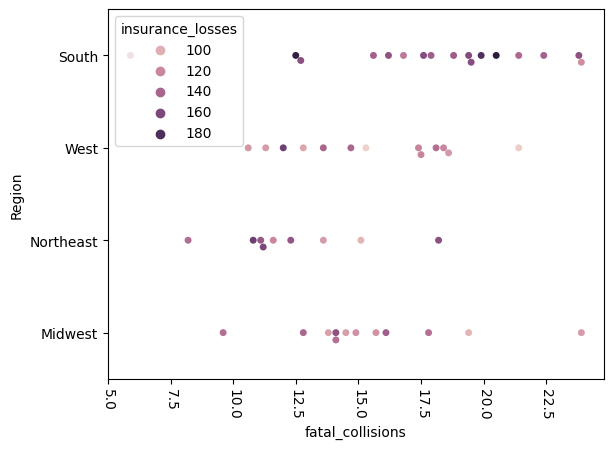

In [19]:
# Plotting swarmplot between fatal_collisions and region
fig, ax = plt.subplots()
sns.swarmplot(data=insurance, x='fatal_collisions', y='Region', hue='insurance_losses', ax=ax)
ax2.set(title="Swarm Plot")
plt.xticks(rotation=-90)
plt.show()

## 6. Box Plot
Syntax:

**sns.boxplot(data=df, x='Colname', y='ColName')**

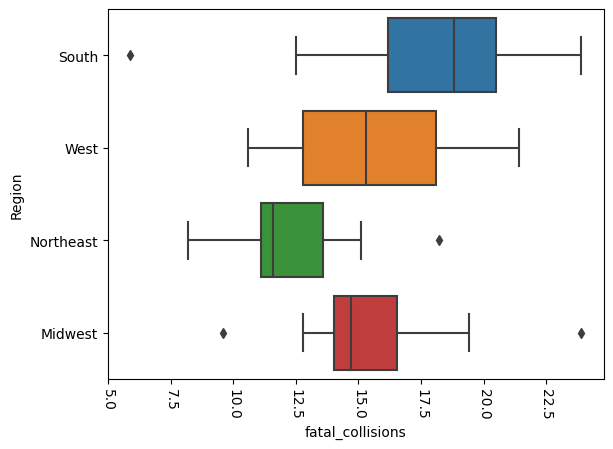

In [20]:
# Plotting box plot between fataL_collisions and region
sns.boxplot(data=insurance, x='fatal_collisions', y='Region')
plt.xticks(rotation=-90)
plt.show()

## 7. Violin Plot

Violin plot is the mixture of boxplot and kernel density plot (kde)

**sns.violinplot(data=df, x='ColName',y='ColName')**

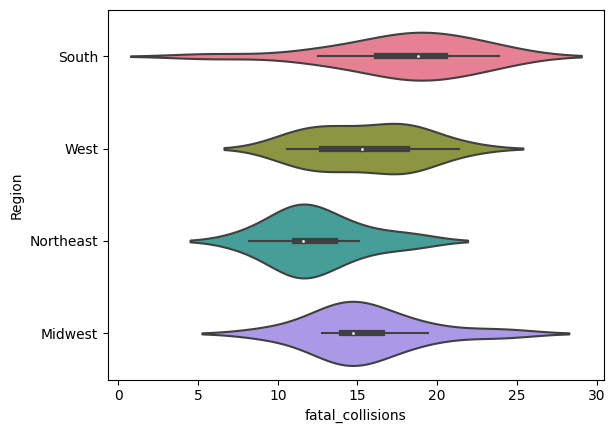

In [21]:
# Making a violin plot between fatal_collisions and region
sns.violinplot(data=insurance, x='fatal_collisions',y='Region', palette='husl')
plt.show()

## 7. Boxen Plot
Boxen plot is the combination of box plot and violin plot but renders faster and is more efficient

**sns.boxenplot(data=df, x="colName", y="colName", palette="husl", hue="colName")**

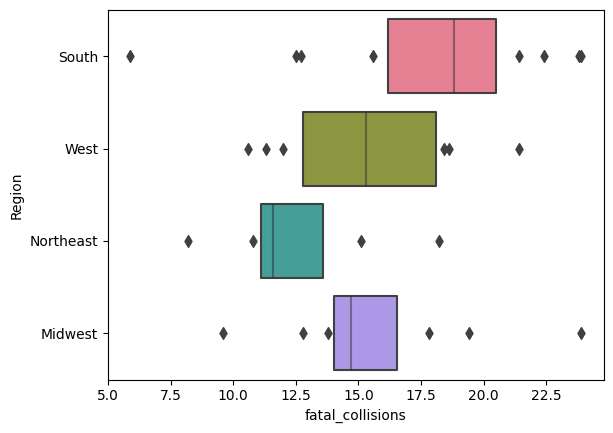

In [22]:
# Making a boxen plot between fatal_collisions and region
sns.boxenplot(data=insurance, x='fatal_collisions',y='Region', palette='husl')
plt.show()

## 8. Heatmap Plot

Used to generate matrix like plot like heatmap plot

Also used to study correlation between variables and proceed further on which variables should be estimated to be correlated

Syntax:

**sns.heatmap(pd.crosstab(df['ColName'],pd['ColName']), values = df['totalColumn'], aggfunc="mean")**

### Checking correlation:
**cols = ['col1','col2','col3','col4']**

**sns.heatmap(df[cols].corr(), cmap='YlGnBu')**


Customizing Heatmap:

**sns.heatmap(..., annot=True, fmt="d", cmap="YlGnBu", cbar=False, linewidths = 5)**

1. ... => pd.crosstab(df['ColName'],pd['ColName'], values = df['totalColumn'], aggfunc="mean")

2. annot = Used to display numbers inside cell (annotations)
3. fmt = display format of numbers (decimal)
4. cmap = custom color palette
5. cbar = disables color bars legend
6. linewidths = adds gap between each cell


fatal_collisions_alc  16  23  24  25  26  27  28  29  30  31  32  33  34  35  \
Region                                                                         
Midwest                0   0   1   1   0   0   1   2   0   0   0   2   3   1   
Northeast              0   0   0   0   0   0   1   1   3   1   0   0   0   1   
South                  0   1   0   1   1   2   1   3   2   2   1   1   0   0   
West                   1   0   0   1   1   1   3   1   0   0   2   1   0   0   

fatal_collisions_alc  36  38  41  42  44  
Region                                    
Midwest                0   0   0   1   0  
Northeast              1   1   0   0   0  
South                  0   1   1   0   0  
West                   0   0   1   0   1  


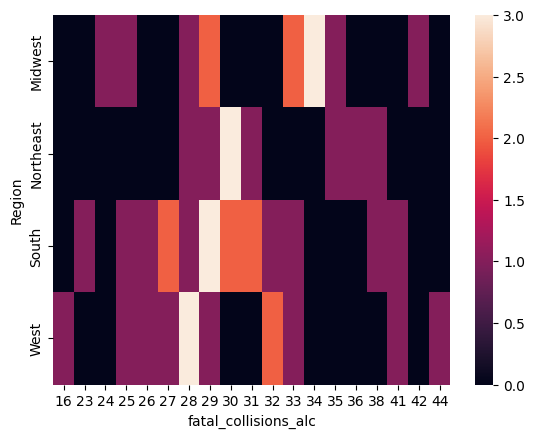

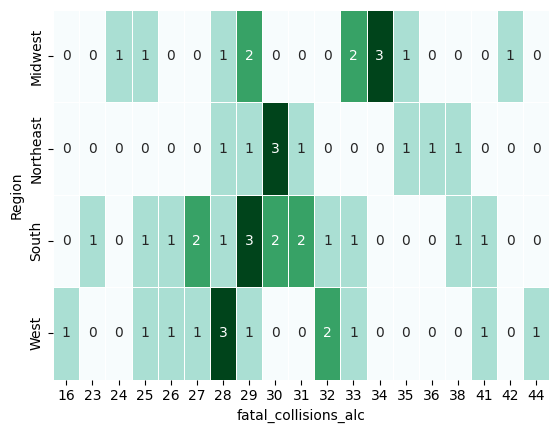

In [23]:
# Checking heatmap between region and fatal_collisions_alc
crosstabbed_col = pd.crosstab(insurance['Region'],insurance['fatal_collisions_alc'])

print(crosstabbed_col)
sns.heatmap(crosstabbed_col)
plt.show()

# Customizing the plot
sns.heatmap(crosstabbed_col, annot=True,cbar = False, cmap="BuGn", linewidths = 0.4)
plt.show()

# Joint Grid and Joint Plot

## THE ULTIMATE PLOT
Used to compare two variables using scatter plots, regression lines, histograms, kernel density estimates, distribution plot

Syntax:

**g = sns.JointGrid(data=df, x="ColName", y="ColName")**

**g.plot(sns.regplot, sns.histplot)**

To show kde in center
**g=sns.JointGrid(data=df, x="ColName", y="ColName")**

**g=g.plot_joint(sns.kdeplot)**

**g=g.plot_marginals(sns.kdeplot, shade=True)**


## Alternative way
**sns.jointplot(data=df, x="ColName", y="ColName", kind='reg')**

kind = can be any from ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid]

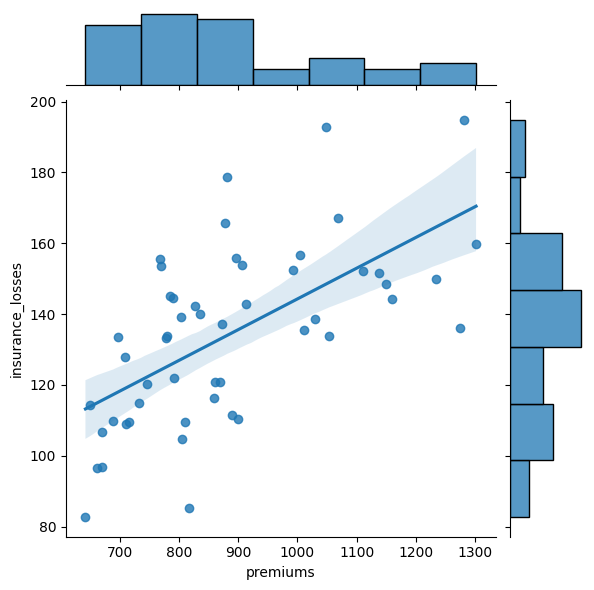

c:\Users\xarad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1877: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, ax=self.ax_marg_x, **kwargs)
c:\Users\xarad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1883: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(y=self.y, ax=self.ax_marg_y, **kwargs)


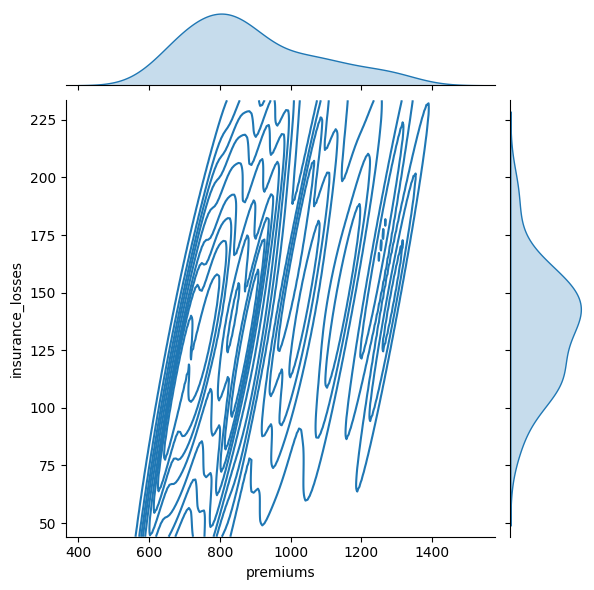

In [24]:
# Plotting a joint plot between premiums and insurance_losses
g = sns.JointGrid(data=insurance, x="premiums", y="insurance_losses")
g.plot(sns.regplot, sns.histplot)
plt.show()

# Plotting the kde kind of grid
kdePlot = sns.JointGrid(data=insurance, x='premiums', y='insurance_losses')
kdePlot = kdePlot.plot_joint(sns.kdeplot)
kdePlot = kdePlot.plot_marginals(sns.kdeplot, shade=True)
plt.show()

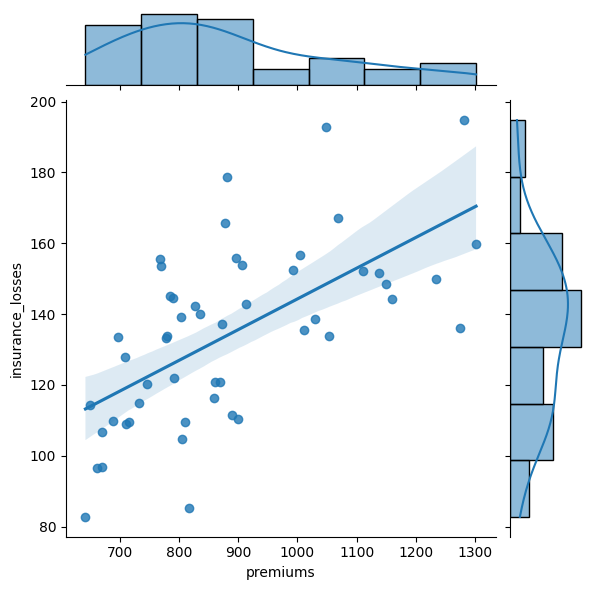

c:\Users\xarad\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1826: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=self.x, y=self.y, **kwargs)


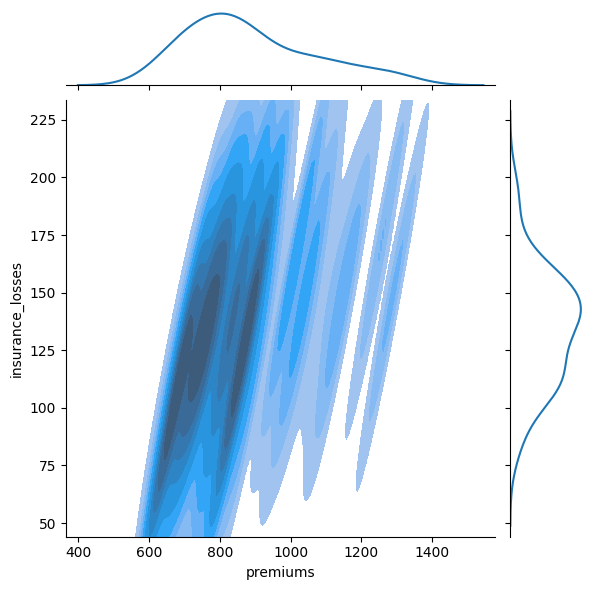

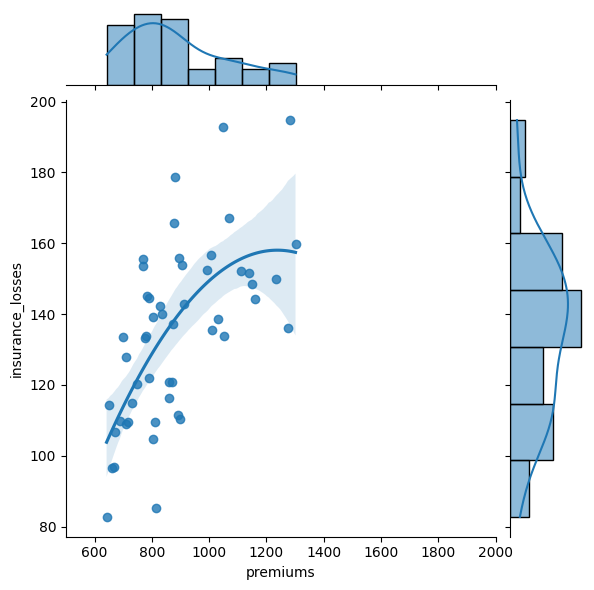

In [25]:
# Alternative way of doing the same thing above
sns.jointplot(data=insurance, x="premiums", y="insurance_losses", kind="reg")
plt.show()

sns.jointplot(data=insurance, x="premiums", y="insurance_losses", kind="kde", shade=True)
plt.show()

# Plotting second order polynomial
sns.jointplot(data=insurance, x="premiums", y="insurance_losses", kind="reg", order=2, xlim=(500,2000))
plt.show()

# Styling the plot
Using seaborn styles

Syntax:
**sns.set( )** : changes to seaborn style instead of matplotlib
**sns.set_style( )** : changes to inbuilt styles

In [26]:
# Peeking into insurance data frame
insurance.head(5)

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


In [27]:
# Looking into datatypes
insurance.dtypes

State                               object
fatal_collisions                   float64
fatal_collisions_speeding            int64
fatal_collisions_alc                 int64
fatal_collisions_not_distracted      int64
fatal_collisions_no_hist             int64
premiums                           float64
insurance_losses                   float64
Region                              object
dtype: object

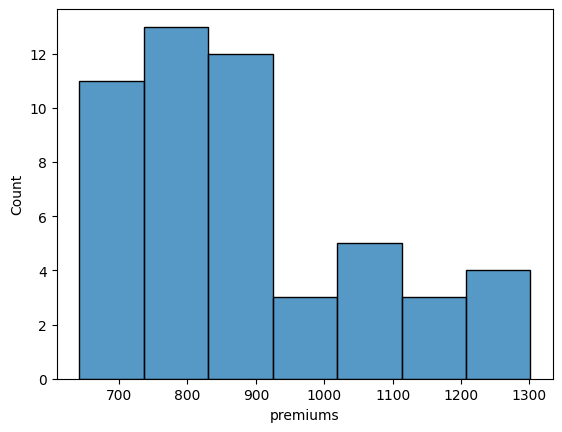

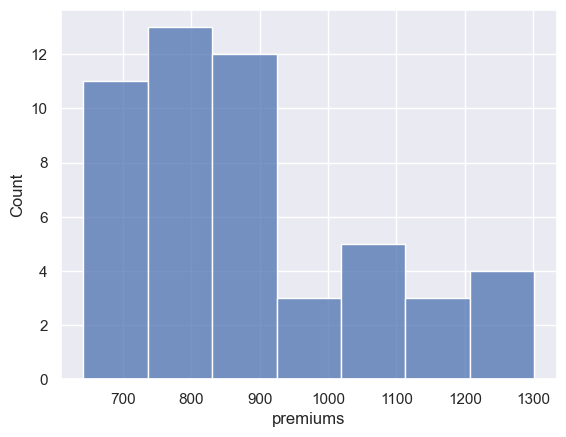

In [28]:
# Plotting premiums in different styles
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=insurance, x='premiums')
plt.show()

# Setting to seaborn style
sns.set()
sns.histplot(data=insurance, x='premiums')
plt.show()

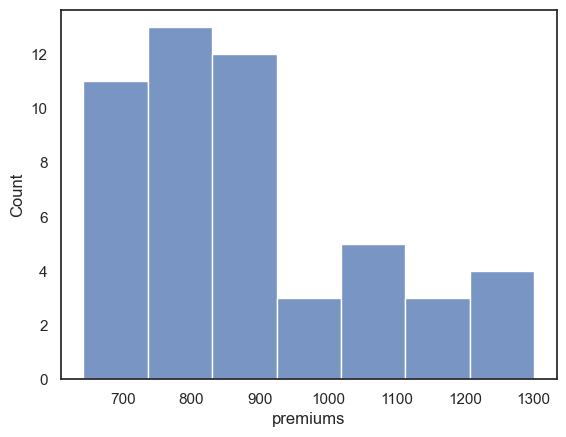

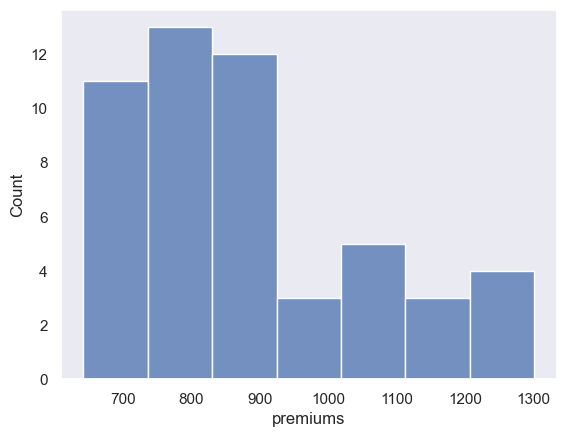

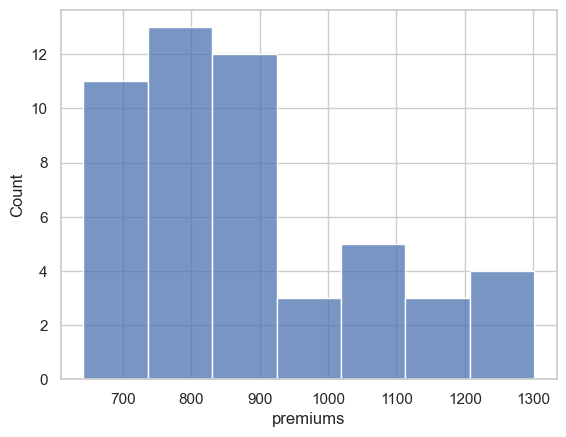

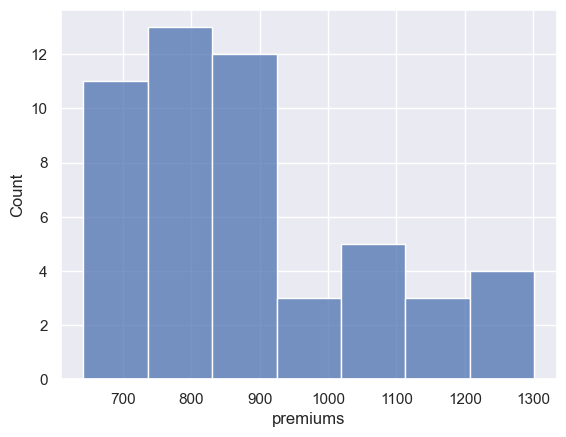

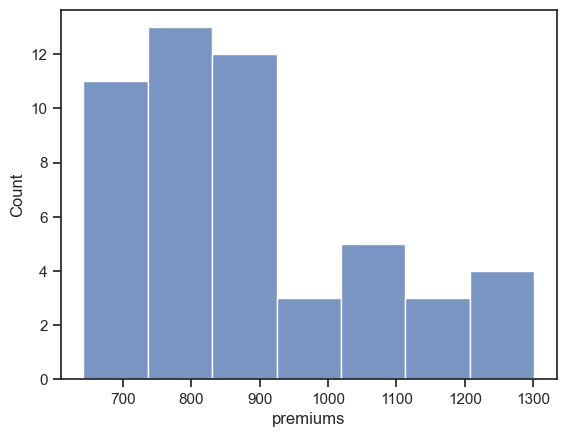

In [29]:
# checking out other options in set_style
styles = ['white','dark','whitegrid','darkgrid','ticks']

for style in styles:
    sns.set_style(style)
    sns.histplot(data=insurance, x='premiums')
    plt.show()

## Removing axes 
use despine to remove spines axes

Syntax:

**sns.despine(top=True, right=True, left=True, bottom=False, offset=None, trim=False)**

True removes the spine
False keeps the spine



## Colors

Syntax:

**sns.set(color_codes=True)**

**sns.displot(df['colName'], color='g')**

**sns.set_palette(paletteName)**

**sns.palplot(sns.color_palette("Name", 12)) => Used to print color palette**

Three types of color palettes:
1. circular colors : no gradient, just bunch of random colors
	Example: Paired
2. sequential colors : gradient from lowest to highest
	Example: Blues
3. diverging colors : gradient from one color to another color, mostly used with data where both lowest and highest values are important. Example: BrBG

In [30]:
# Looking into the dataset
insurance.head(3)

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West


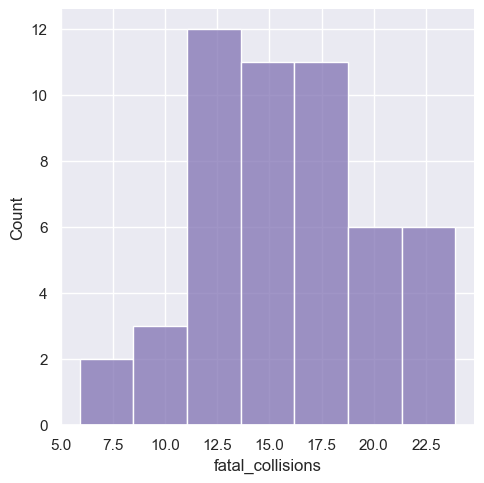

In [31]:
# Setting color code from matplotlib
sns.set(color_codes = True)
# magenta color code
sns.displot(insurance['fatal_collisions'], color='m')
plt.show()

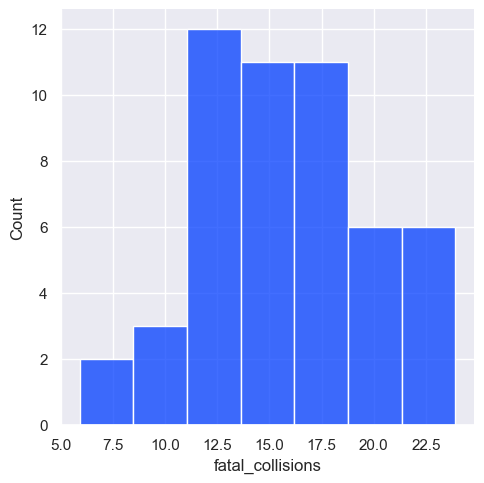

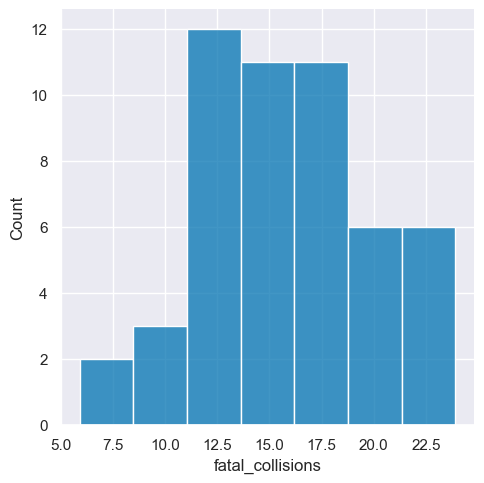

In [32]:
# Setting color palettes
color_palettes = ["bright", "colorblind"]

# printing plot in all color in list
for color in color_palettes:
    sns.set_palette(color)
    sns.displot(insurance['fatal_collisions'])
    plt.show()

## Creating automatic color palettes and displaying it

use 

**palette_name = sns.color_palette('PaletteName', 9)**
To generate PaletteName with 9 gradients

**sns.palplot(palette_name)** to plot the palette

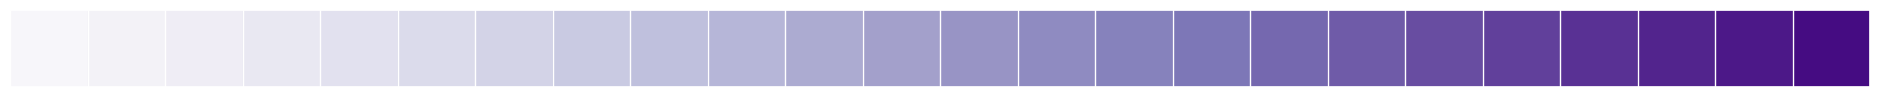

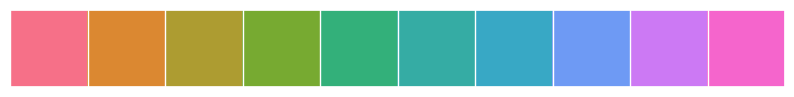

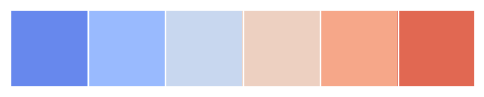

In [33]:
# Creating purple color palette with 24 colors
purple_palette = sns.color_palette('Purples', 24)
# print(purple_palette)

# plotting the palette
sns.palplot(purple_palette)

# Creating HUSL palette with 10 colors and plotting
sns.palplot(sns.color_palette('husl',10))

# Creating diverging color palette coolwarm
sns.palplot(sns.color_palette('coolwarm',6))

## Axes Styling
 
 Syntax:
 Set the axis parameter to a variable first

**fig, ax1 = plt.subplots()**

**sns.histplot(df['colName'], ax=ax1)**
 
 **ax1.set(xlabel='Xlabel', xlim=(0,90000), title="Title of the whole graph")**

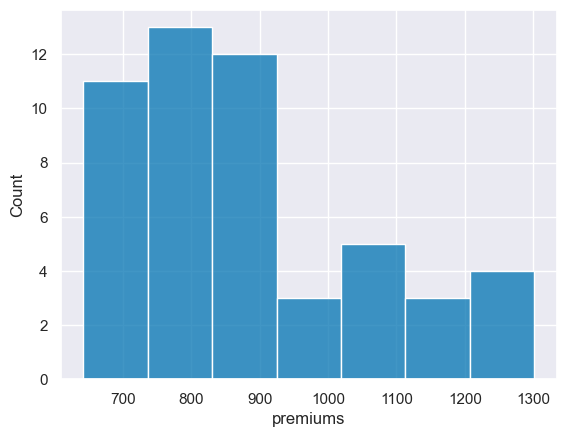

<Figure size 640x480 with 0 Axes>

In [34]:
# Visualizing the data of insurance

sns.histplot(insurance['premiums'])
plt.show()
plt.clf()

## CHANGING LIMITS OF X AXIS

Syntax:
**fig, ax = plt.subplots()**

**ax.set(xlim=(1,10), ylim=(1,10), xlabel = "", ylabel="", title="")**

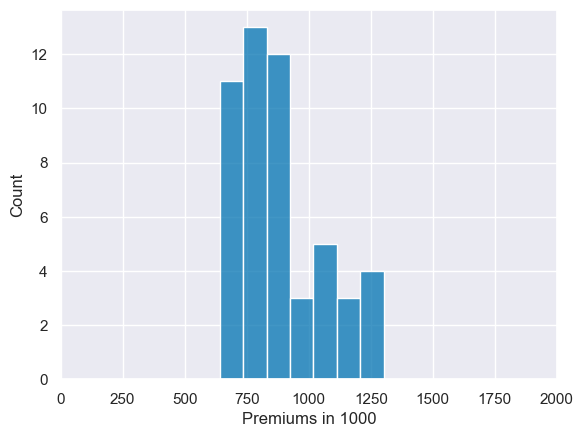

In [35]:
# With the customization
fig, ax = plt.subplots()
sns.histplot(insurance['premiums'], ax=ax)
ax.set(xlabel='Premiums in 1000', xlim = (0,2000))
plt.show()


**PLOT TITLES AND LABELS:**

_IMPORTANT CONCEPT_:
There are two kinds of plots:
1. FacetGrid : grids from categorical plots , uses g.fig.suptitle to set the title
2. AxesSubPlot : frids from single plot like lineplot, scatterplot, use g.set_title to set the title

_FOR FACET GRIDS like catplots_
**g = sns.catplot(x,y,data)**

**g.fig.suptitle("New Title")**

**SETS THE TITLE OF THE WHOLE FIGURE**

_FOR AXES SUB PLOTS LIKE lineplot_
**g.set_title("New Title", y=)**

y is used to adjust the height of plot


## Rotating the labels to avoid messy letters
**plt.xticks(rotation=90)**

used to rotate the x label by 90 degrees

# FACET GRID
research when needed

Catplot is one example
lmplot is another example

# PAIR GRID